<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20258/Assignment%201/CMPE_258_Assignment_1_Part_1_Black_Box_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 258 Assignment 1 Part 1 Black Box Deep Learning

## Installing the Libraries

In [1]:
pip install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     |████████████████████████████████| 199.3 MB 62 kB/s 
     |████████████████████████████████| 16.2 MB 32.8 MB/s 
     |████████████████████████████████| 2.7 MB 713 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Successfully uninstalled torchvision-0.11.1+cu111
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.10.0+cu111
    Uninstalling torchaudio-0.10.0+cu111:
      Successfully uninstalled torchaudio-0.10.0+cu111


In [2]:
!pip install fastai

In [3]:
!pip install fastai==2.0.15

     |████████████████████████████████| 185 kB 4.3 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [4]:
!pip install fastbook --upgrade

     |████████████████████████████████| 720 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 43.1 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 189 kB 54.2 MB/s 
     |████████████████████████████████| 51 kB 271 kB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 2.0.15
    Uninstalling fastai-2.0.15:
      Successfully uninstalled fastai-2.0.15


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## cnn_learner for image classification

Dataset link: https://www.robots.ox.ac.uk/~vgg/data/pets/

This dataset contains about 7400 images consisting of cats and dogs and we will tune the pre-trained CNN model(convolution neural networks) and finetune to latest updates, which is designed for recognizing cats and dogs.

In [6]:
from fastai.vision.all import *

In [7]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [9]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.147051,0.022854,0.006089,34:32


In [10]:
is_cat,_,probs = learn.predict('/content/drive/MyDrive/Dataset/img.jpg')
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


## unet_learner for segmentation

Segementation is a process which can capture and identify every single pixel in an image. This prebuilt model is defined with the usecase to identify the pixels in an image.

In [26]:
path = untar_data(URLs.CAMVID_TINY) # camvid dataset
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [27]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,3.954025,2.937425,01:07


epoch,train_loss,valid_loss,time
0,2.150786,1.742037,01:11


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


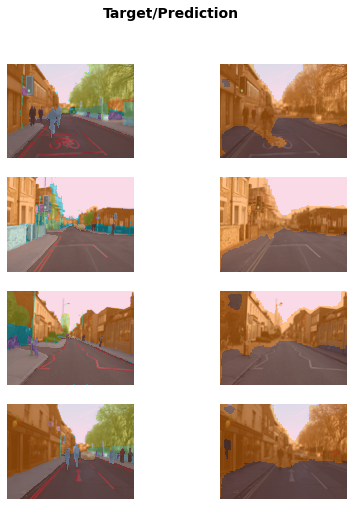

In [28]:
learn.show_results(max_n=4, figsize=(7,8))

## text_classifier_learner for sentiment analysis

In sentiment analysis, we will use dataset which contains tweets regarding Corona, where this model is trained to predict the sentiment of a tweet.

In [14]:
from fastai.text.all import *
import pandas as pd

In [15]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Corona NLP Data/Corona_NLP_train.csv", usecols = ['OriginalTweet', 'Sentiment'], encoding = 'latin1')
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [16]:
dls_lm = TextDataLoaders.from_df(df, 
                                 text_col = 'OriginalTweet', 
                                 label_col = 'Sentiment', 
                                 valid_pct = 0.20, 
                                 bs = 64, 
                                 is_lm = True)

In [17]:
dls_lm.show_batch(max_n = 1)

,text,text_
0,"xxbos xxmaj struggling to get your favorite xxmaj xxunk products during xxmaj covid 19 ? \r\r\n\r\r\n xxmaj some customers may find their usual products not readily available at their local supermarket such as xxmaj xxunk xxmaj pay . https : / / t.co / xxunk xxbos xxmaj you know the nation that , makes the prices high when they are needed the most , do not tolerate another being , do n't","xxmaj struggling to get your favorite xxmaj xxunk products during xxmaj covid 19 ? \r\r\n\r\r\n xxmaj some customers may find their usual products not readily available at their local supermarket such as xxmaj xxunk xxmaj pay . https : / / t.co / xxunk xxbos xxmaj you know the nation that , makes the prices high when they are needed the most , do not tolerate another being , do n't care"


In [18]:
learn_text_language = language_model_learner(dls_lm, AWD_LSTM, drop_mult = 0.3)

In [19]:
learn_text_language.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,time
0,3.942978,3.843999,58:14


In [20]:
learn_text_language.save_encoder('finetuned')

In [21]:
dls_clas = TextDataLoaders.from_df(df, 
                        valid_pct = 0.2, 
                        text_col = 'OriginalTweet',
                        label_col = 'Sentiment', 
                        bs = 64, 
                        text_vocab = dls_lm.vocab)

In [22]:
learn_text = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult = 0.5, metrics = accuracy).to_fp16()# load our saved encoder
learn_text = learn_text.load_encoder('finetuned')

/usr/local/lib/python3.7/dist-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(valley=0.0030199517495930195)

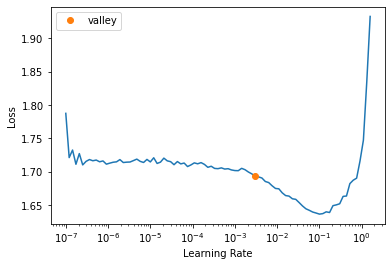

In [23]:
learn_text.lr_find()

In [24]:
learn_text.fit_one_cycle(1, 2e-3)

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time
0,1.414242,1.345562,0.408820,23:06


In [25]:
learn_text.predict('This was a really bad day in my life. My whole family except my dad was infected.')

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


('Extremely Negative',
 TensorText(0),
 TensorText([0.4204, 0.1594, 0.2312, 0.0964, 0.0927]))

## tabular_learner for decisiontree

we will use house price prediction dataset, which is a tabular dataset and contains information regarding various detail of an house like area, region, Utilities, etc.

In [3]:
pip install fastai==1.0.58

In [4]:
import pandas as pd
from fastai import *
from fastai.tabular import *
from fastai.tabular.data import *

In [5]:
# load Data
train = pd.read_csv("/content/drive/MyDrive/Dataset/HousePricePrediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Dataset/HousePricePrediction/test.csv")

In [6]:
test_id = test['Id']
test.fillna(value = test.mean(), inplace = True)

train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
dep_var = 'SalePrice'
# cat_names = train.select_dtypes(include=['object']).columns.tolist()
cat_names = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
             'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
             'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
             'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
             'MSSubClass', 'OverallQual', 'OverallCond','BsmtFullBath',
              'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces','GarageCars','YrSold' , 'MoSold', 'LowQualFinSF' , 'PoolArea', 
             'YearBuilt', 'YearRemodAdd' , 'MiscVal', '3SsnPorch']


In [8]:
# cont_names = train.select_dtypes(include=[np.number]).columns.tolist()
cont_names = [  'LotFrontage', 'LotArea',  
               'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
              'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea',
              'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']

In [9]:
print("Categorical columns are : ", cat_names)
print('Continuous numerical columns are :', cont_names)

Categorical columns are :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YrSold', 'MoSold', 'LowQualFinSF', 'PoolArea', 'YearBuilt', 'YearRemodAdd', 'MiscVal', '3SsnPorch']
Continuous numerical columns are : ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',

In [10]:
procs = [FillMissing, Categorify, Normalize]

In [11]:
# Test tabularlist
test = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [12]:
# Train data bunch
data = (TabularList.from_df(train, path='.', cat_names=cat_names, cont_names=cont_names, procs=procs)
                        .split_by_rand_pct(valid_pct = 0.1, seed = 42)
                        .label_from_df(cols = dep_var, label_cls = FloatList, log = True )
                        .add_test(test)
                        .databunch())

In [13]:
data.show_batch(rows = 10)

MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,YrSold,MoSold,LowQualFinSF,PoolArea,YearBuilt,YearRemodAdd,MiscVal,3SsnPorch,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,target
RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Detchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,20,6,5,1,0,1,0,3,1,6,0,2,2008,7,0,0,2003,2004,0,0,False,False,False,-0.1652,0.2951,-0.5837,0.8084,-0.2792,-0.6027,0.1317,-0.1293,-0.8039,-0.7824,1.0554,0.4930,-0.7483,0.4461,-0.3578,-0.2710,11.95118
RL,Pave,#na#,Reg,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,SLvl,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,Gd,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,80,7,5,1,1,2,0,2,1,5,1,2,2009,8,0,0,1989,1989,0,0,True,False,False,-0.0294,0.2092,0.2367,2.3544,-0.2792,-1.2788,1.0594,1.2497,-0.8039,0.2391,0.4309,0.4597,-0.1173,-0.7094,-0.3578,6.7623,12.524527
RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,CBlock,TA,TA,Av,ALQ,BLQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,#na#,GdWo,#na#,WD,Normal,80,5,5,1,0,1,0,3,1,6,1,2,2006,6,0,0,1966,1966,0,0,False,False,False,0.6947,0.2668,5.3400,0.1540,0.5451,-0.4224,-0.0750,-0.2022,-0.8039,-0.8364,-0.5268,0.0552,-0.7483,-0.7094,-0.3578,-0.2710,11.982616
RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,#na#,#na#,#na#,#na#,#na#,Y,#na#,#na#,Shed,WD,Normal,20,4,5,1,0,1,1,3,1,6,0,0,2010,1,0,0,1959,1959,400,0,False,False,True,0.3326,-0.1246,-0.5837,0.2704,-0.2792,-0.4201,-0.2449,0.1595,-0.8039,-0.5685,0.0561,-2.2478,2.0280,-0.7094,-0.3578,-0.2710,11.76718
RL,Pave,#na#,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,60,8,5,1,0,2,1,3,1,7,1,2,2006,11,0,0,2002,2002,0,0,False,False,False,0.9209,0.0718,0.6044,1.0676,-0.2792,-0.9791,0.0192,-0.1891,1.2540,0.9041,0.9722,0.5406,0.8213,0.1795,-0.3578,-0.2710,12.4490185
RM,Pave,#na#,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,WdShing,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,BuiltIn,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,50,6,7,0,0,1,0,3,1,5,1,1,2008,7,0,0,1929,1950,0,0,False,False,False,-0.8893,-0.4431,-0.5837,-0.9791,-0.2792,0.6639,-0.4470,-0.5560,-0.3272,-0.6976,-2.0674,-1.2581,-0.7483,-0.7094,1.4526,-0.2710,11.695247
FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,BLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Detchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,160,7,5,1,0,2,1,2,1,4,0,2,2008,3,0,0,1999,2000,0,0,False,False,False,-2.0660,-0.8115,0.6157,0.1408,-0.2792,-1.0760,-1.0486,-1.4042,0.6353,-0.5164,0.8472,-0.0495,-0.7483,0.0017,-0.3578,-0.2710,11.982929
RL,Pave,#na#,IR1,HLS,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Ex,TA,Av,Unf,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,#na#,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,New,Partial,60,7,5,0,0,2,1,3,1,6,0,2,2009,7,0,0,2009,2009,0,0,False,False,F

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,root_mean_squared_error,time
0,49.116619,2.700004,1.642290,00:00


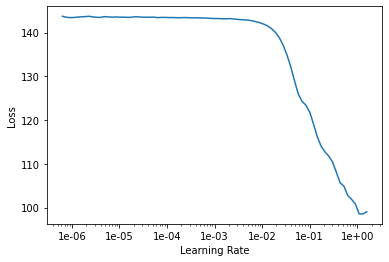

In [14]:
# Create deep learning model
learn_tabular = tabular_learner(data, layers=[200,100], metrics=rmse)

# select the appropriate learning rate
learn_tabular.lr_find()

# we typically find the point where the slope is steepest
learn_tabular.recorder.plot()

# Fit the model based on selected learning rate
learn_tabular.fit_one_cycle(1, max_lr =1e-01)

In [16]:
# get predictions
preds, targets = learn_tabular.get_preds(DatasetType.Test)
labels = [np.exp(p[0].data.item()) for p in preds]
labels

[23238.684593561433,
 26016.736545073385,
 199635.29875033651,
 39917.76874221883,
 37079.858394154566,
 43874.887842999175,
 13504.953266006507,
 27464.58348227542,
 20533.95876079058,
 16342.428267018811,
 18619.567214114493,
 11447.762596113165,
 11800.345103569482,
 9283.403055278568,
 6843.2005543594505,
 77876.7857137371,
 31682.82956435786,
 75789.6349171986,
 50089.44709460935,
 324471.14724290936,
 315453.9399306804,
 11149.702454312512,
 20115.663599018702,
 13254.964208830257,
 14088.671801846494,
 21049.8755132237,
 198456.29995081222,
 14110.131992699387,
 24115.76354278023,
 34383.843381976534,
 16030.265536283207,
 8751.643613755441,
 15808.506965905728,
 921783.822785113,
 185250.30615226645,
 27587.700347778562,
 18160.409592299384,
 7235.791587605818,
 7222.713004970232,
 11673.772139258206,
 12071.141968491158,
 40528.59873288783,
 64415.8724806924,
 74752.37220184426,
 69040.819365178,
 30705.06440235604,
 45373.344763384615,
 77385.86126899574,
 36624.246286767935,

##  collab_learner for ranking

We will use this model as a recommender system, which will predict the rating for a song.

In [3]:
pip install fastai==1.0.58

     |████████████████████████████████| 236 kB 7.5 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [7]:
from fastai.collab import *
from fastai.tabular import *
from fastai.basics import *
from fastai.collab import CollabDataBunch, collab_learner

In [8]:
ratings = pd.read_csv('/content/drive/MyDrive/Dataset/Song Dataset/songsDataset.csv')
ratings.head()

,'userID','songID','rating'
0,0,7171,5
1,0,8637,4
2,0,21966,4
3,0,35821,5
4,0,82446,5


In [9]:
ratings.columns = ['userID', 'songID', 'rating']

In [10]:
ratings['rating'].value_counts()

5    780134
1    399243
4    344972
3    287831
2    187820
Name: rating, dtype: int64

In [11]:
data = CollabDataBunch.from_df(ratings, seed=42, valid_pct=0.2)

In [12]:
data.show_batch()

userID,songID,target
194321,24309,5.0
89590,44714,2.0
142820,19290,3.0
103383,3852,5.0
198525,75780,3.0


In [13]:
y_range = [0.5,5.5]

In [14]:
learn_collab = collab_learner(data, n_factors=50, y_range=y_range, wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


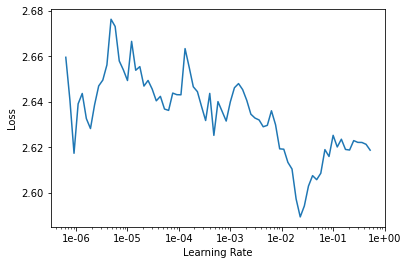

In [15]:
learn_collab.lr_find()
learn_collab.recorder.plot(skip_end=15)

In [16]:
learn_collab.fit_one_cycle(1, 1e-01)

epoch,train_loss,valid_loss,time
0,2.448001,2.450012,3:37:26


In [19]:
learn_collab.show_results()

userID,songID,target,prediction
182840,68252,5.0,3.2997315
120007,52200,4.0,2.9762938
19484,135894,5.0,3.0358117
162905,81768,3.0,3.1916566
19114,68130,3.0,2.9817424
